In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/home/kushaj/Desktop/Github/Final_Techgig/data/Color')
path.ls()

[PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/5'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/6'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/3'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/2'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/4'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/0'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/1'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/7'),
 PosixPath('/home/kushaj/Desktop/Github/Final_Techgig/data/Color/models')]

In [3]:
data = (ImageList.from_folder(path)
                 .split_by_rand_pct(0.1)
                 .label_from_folder()
                 .transform(get_transforms(max_lighting=0.4, p_lighting=0.8), size=(140, 140))
                 .databunch(bs=32, num_workers=8)
                 .normalize(imagenet_stats))

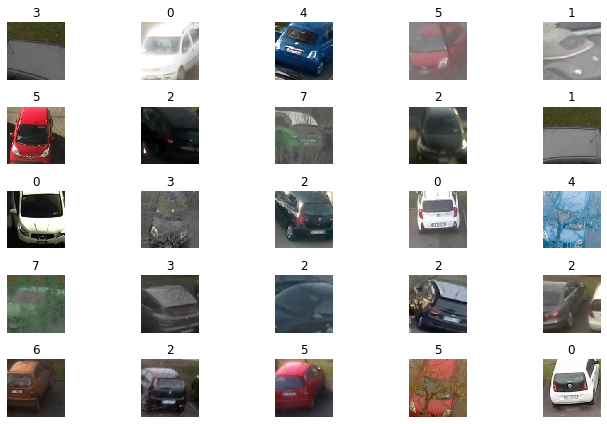

In [4]:
data.show_batch(figsize=(10,6))

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=[ShowGraph])

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


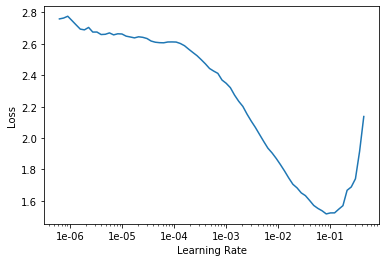

In [7]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.190005,1.079074,0.750000,00:06
1,1.501833,0.917473,0.625000,00:03
2,1.159593,1.569858,0.625000,00:03
3,0.949993,0.774308,0.791667,00:03
4,0.807323,0.814617,0.666667,00:03
5,0.694061,0.498786,0.750000,00:03
6,0.603693,0.307192,0.833333,00:03
7,0.553932,0.427440,0.875000,00:03
8,0.487540,0.490885,0.833333,00:03
9,0.438099,0.477593,0.833333,00:03


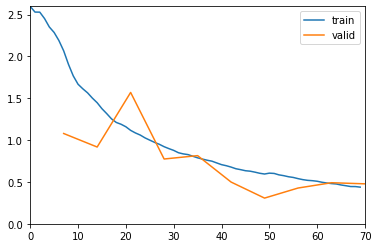

In [8]:
learn.fit_one_cycle(10, max_lr=1e-2)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


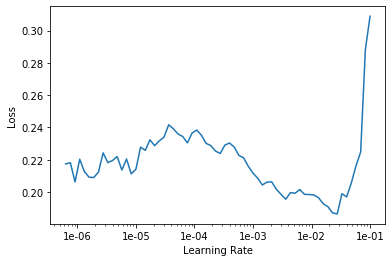

In [10]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.172308,0.440861,0.875000,00:03
1,0.174933,0.437486,0.875000,00:03
2,0.159602,0.835267,0.666667,00:03
3,0.188576,1.273031,0.583333,00:03
4,0.254986,2.598778,0.583333,00:03
5,0.281419,0.981155,0.666667,00:03
6,0.319226,0.512323,0.833333,00:03
7,0.289639,0.587774,0.708333,00:03
8,0.287472,0.674562,0.708333,00:03
9,0.276149,0.719089,0.666667,00:03


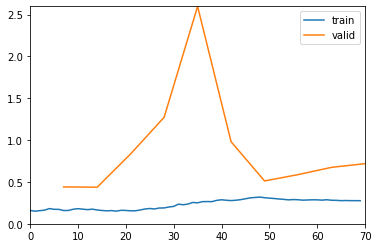

In [11]:
learn.fit_one_cycle(10, max_lr=1e-2)

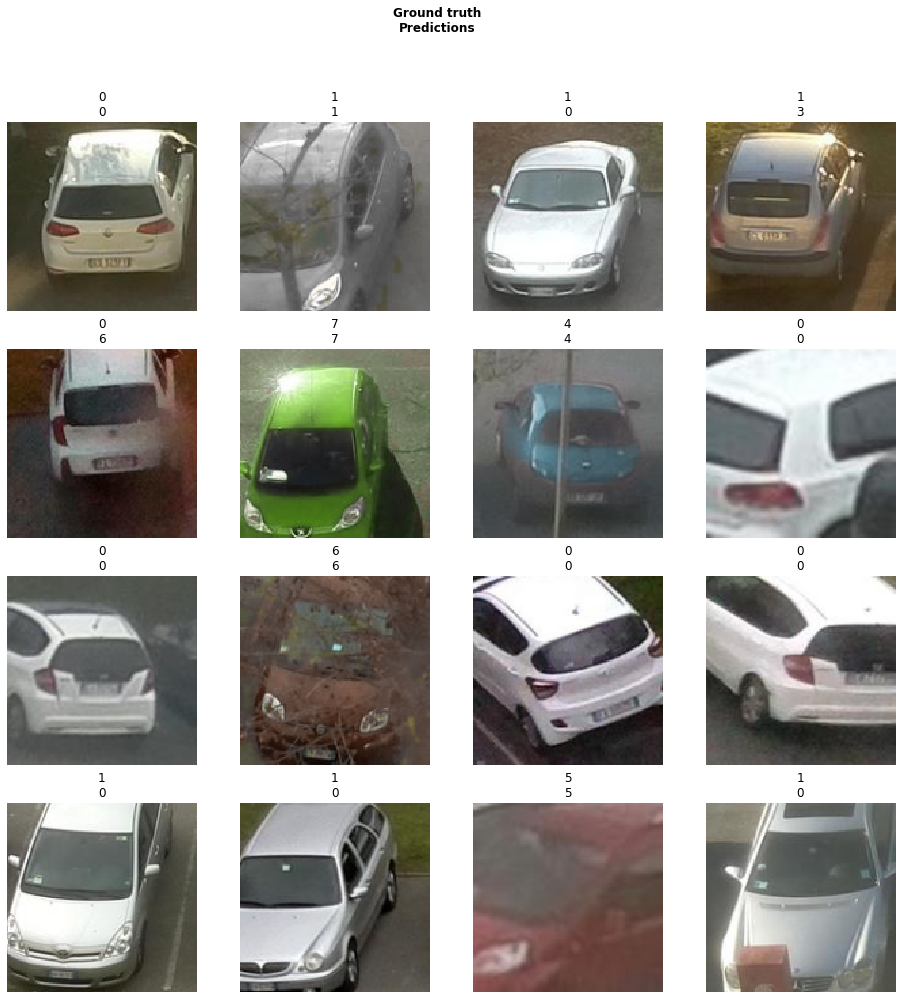

In [14]:
learn.show_results(ds_type=DatasetType.Valid, rows=4)

In [15]:
learn1 = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=[ShowGraph]).mixup()

In [16]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


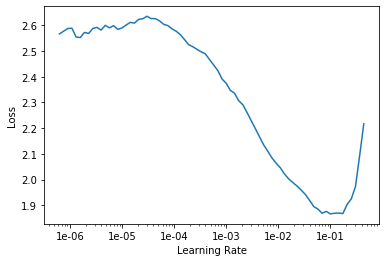

In [18]:
learn1.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.340318,1.637307,0.375000,00:03
1,1.921451,1.710513,0.500000,00:03
2,1.719644,1.820661,0.500000,00:03
3,1.581159,1.581521,0.541667,00:03
4,1.465555,1.618322,0.583333,00:03
5,1.386670,1.380614,0.541667,00:03
6,1.305255,1.311473,0.541667,00:03
7,1.230234,1.105170,0.541667,00:03
8,1.168469,1.003402,0.541667,00:03
9,1.117471,0.936003,0.625000,00:03


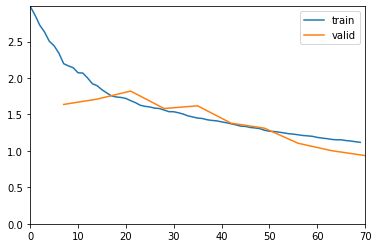

In [19]:
learn1.fit_one_cycle(10, max_lr=1e-2)

In [20]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


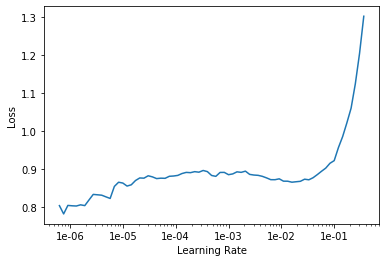

In [21]:
learn1.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.943999,0.907392,0.708333,00:03
1,0.894610,0.901498,0.625000,00:03
2,0.932015,0.904239,0.666667,00:03
3,0.913462,0.919118,0.625000,00:03
4,0.911024,0.900726,0.666667,00:03
5,0.915765,0.883436,0.708333,00:03
6,0.894885,0.892105,0.708333,00:03
7,0.890253,0.897999,0.708333,00:03
8,0.883329,0.904952,0.666667,00:03
9,0.882087,0.897055,0.666667,00:03


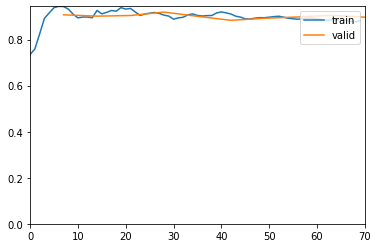

In [22]:
learn1.fit_one_cycle(10, max_lr=1e-5)

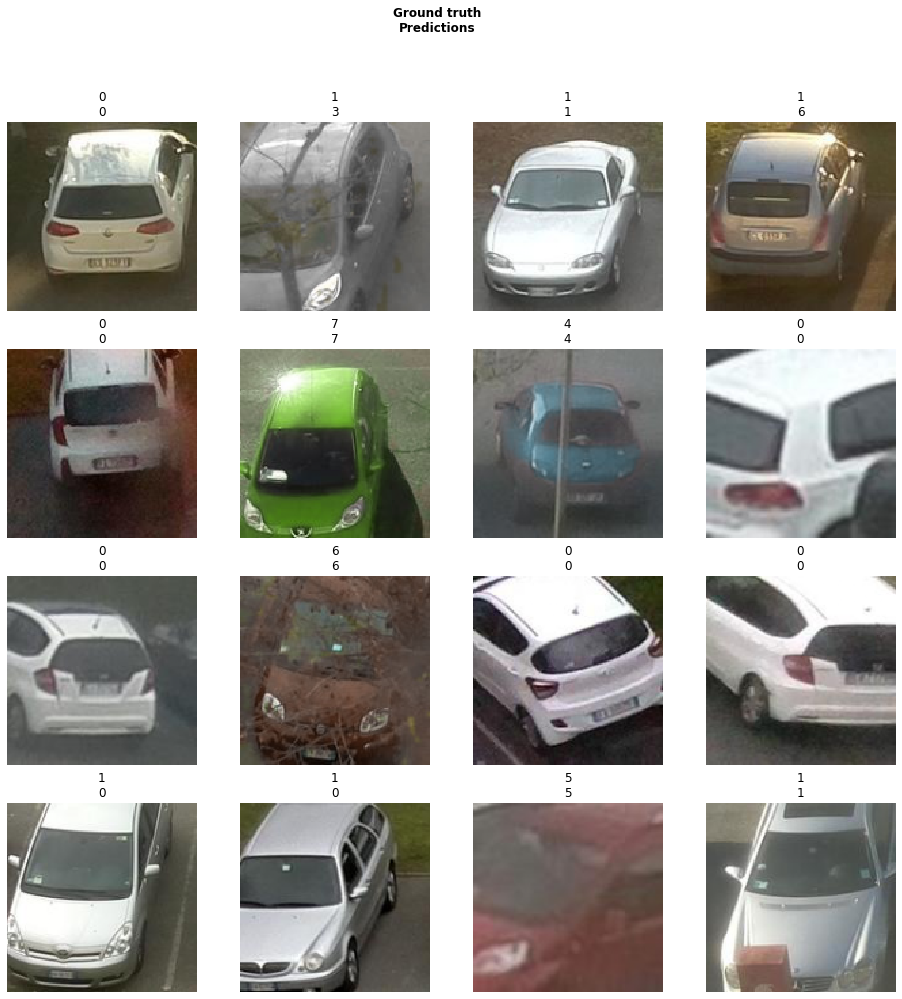

In [23]:
learn1.show_results(ds_type=DatasetType.Valid, rows=4)

# New learner

In [3]:
path = Path('/home/kushaj/Desktop/Github/Final_Techgig/data/color')

In [4]:
data = (ImageList.from_folder(path)
                 .split_by_rand_pct(0.2)
                 .label_from_folder()
                 .transform(get_transforms(), size=(140, 140))
                 .databunch(bs=32, num_workers=8)
                 .normalize(imagenet_stats))

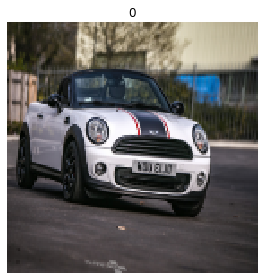

In [58]:
data.show_batch(1)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=[ShowGraph])

epoch,train_loss,valid_loss,accuracy,time
0,1.398578,3.702239,0.441441,00:17
1,1.341090,22.305592,0.126126,00:10
2,1.796512,44.059250,0.144144,00:10
3,2.052419,70.994507,0.225225,00:11
4,2.234324,37.328865,0.225225,00:12
5,2.122423,5.978737,0.594595,00:10
6,2.032535,1.927816,0.630631,00:12
7,1.923485,1.192946,0.648649,00:10
8,1.708885,0.900894,0.729730,00:11
9,1.507095,0.650698,0.756757,00:11


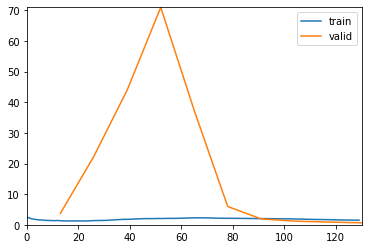

In [6]:
learn.fit_one_cycle(10, max_lr=1e-1)

In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


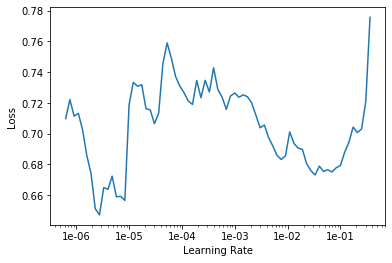

In [62]:
learn.recorder.plot()

In [7]:
learn.unfreeze()

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


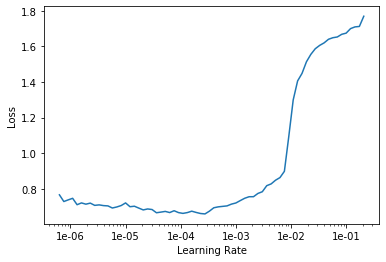

In [65]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.807289,0.617531,0.792793,00:15
1,1.007449,0.672219,0.711712,00:14
2,0.846062,0.742182,0.693694,00:14
3,0.794678,0.640552,0.747748,00:14
4,0.723776,0.666800,0.774775,00:13
5,0.715248,0.603815,0.738739,00:13
6,0.662522,0.557449,0.792793,00:13
7,0.656647,0.537508,0.792793,00:14
8,0.628518,0.523466,0.810811,00:14
9,0.580439,0.530521,0.810811,00:13


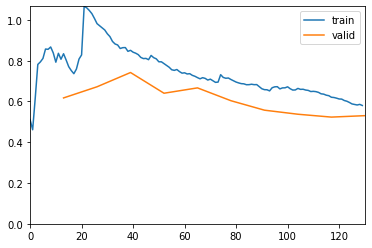

In [8]:
learn.fit_one_cycle(10, max_lr=1e-4)

# Main Learner

In [9]:
path_m = Path('/home/kushaj/Desktop/Github/Final_Techgig/data/Color')

In [10]:
data_m = (ImageList.from_folder(path_m)
                 .split_by_rand_pct(0.1)
                 .label_from_folder()
                 .transform(get_transforms(), size=(140, 140))
                 .databunch(bs=32, num_workers=8)
                 .normalize(imagenet_stats))

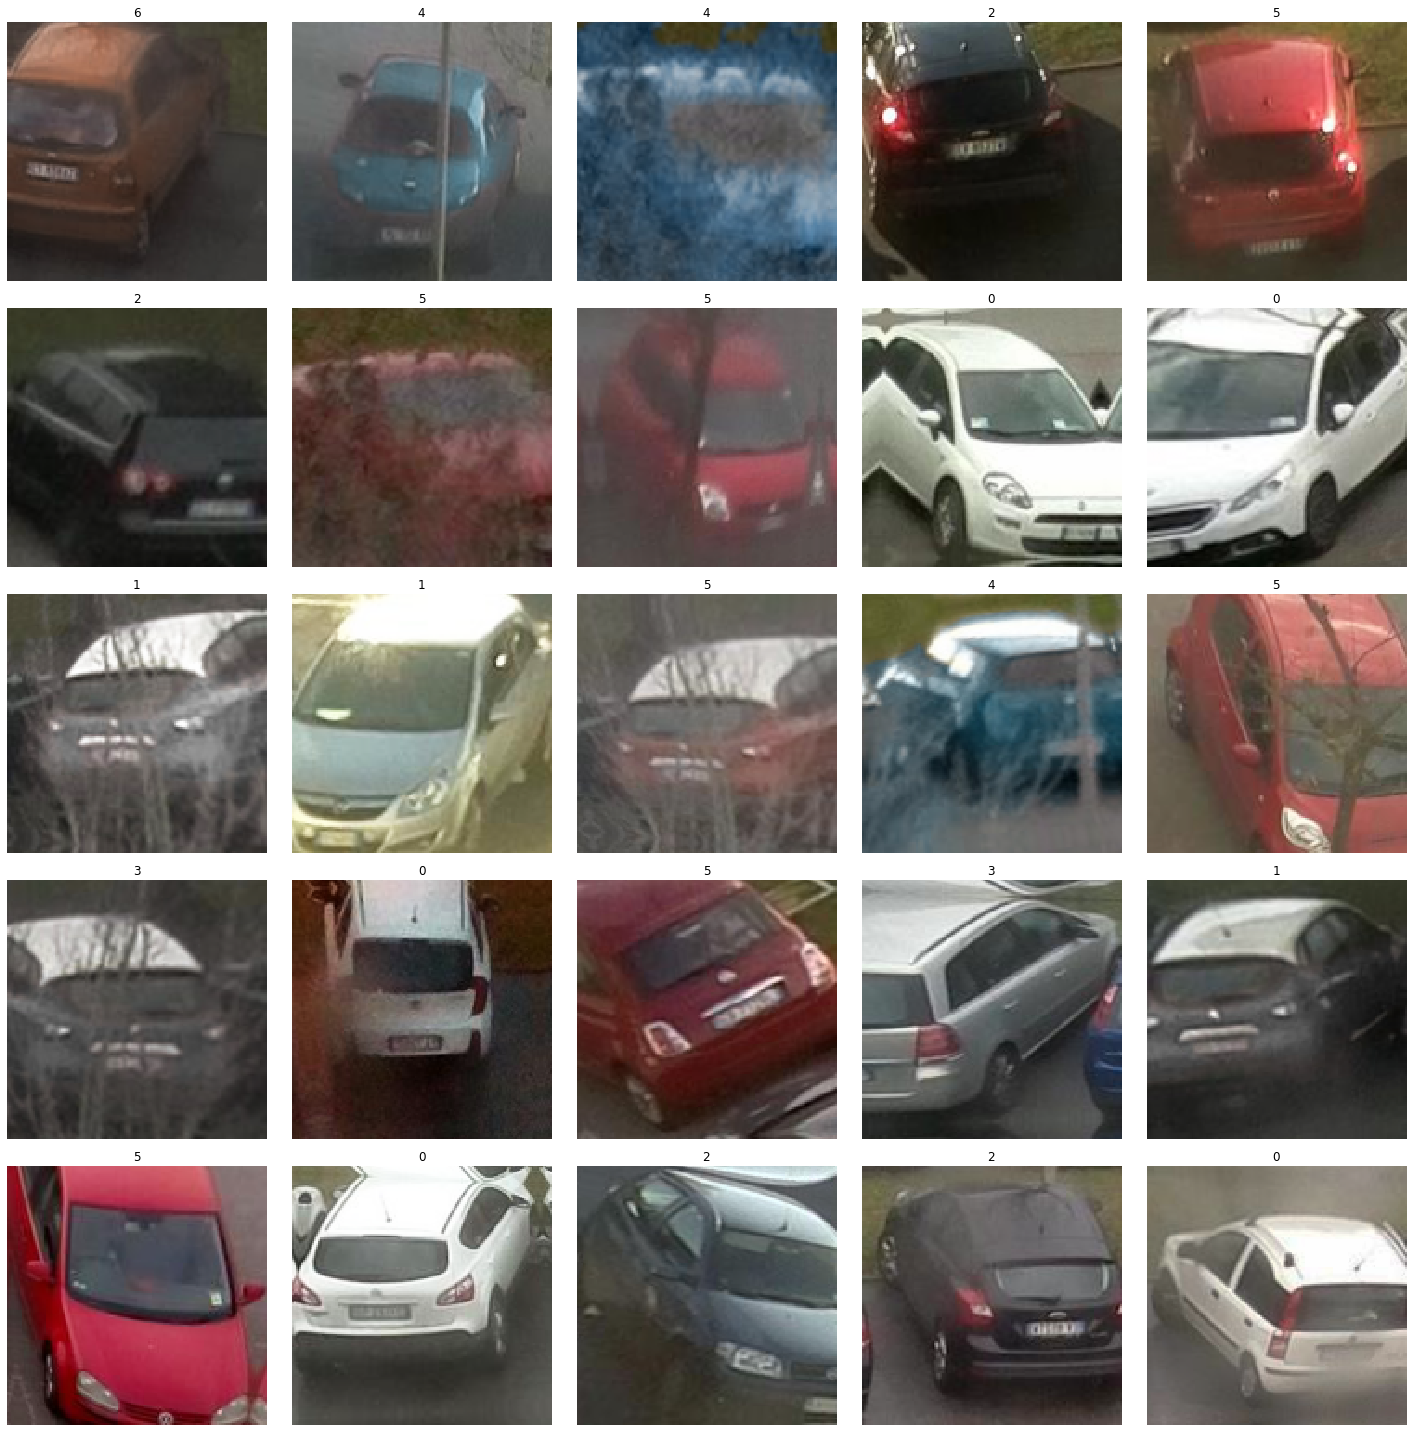

In [69]:
data_m.show_batch()

In [11]:
learn_m = cnn_learner(data_m, models.resnet50, metrics=[accuracy], callback_fns=[ShowGraph])

In [12]:
learn_m.model.state_dict = learn.model.state_dict

In [75]:
learn_m.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


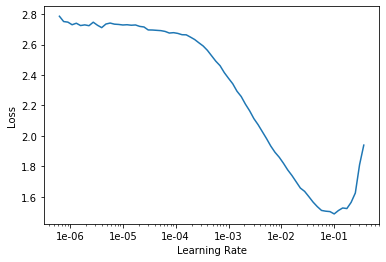

In [76]:
learn_m.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.634030,2.230122,0.458333,00:05
1,1.249367,2.696846,0.458333,00:03
2,1.192144,10.569007,0.250000,00:03
3,1.373096,13.987735,0.208333,00:03
4,1.401998,15.283730,0.250000,00:03
5,1.339725,16.060057,0.291667,00:03
6,1.264982,5.570564,0.500000,00:03
7,1.169902,3.189468,0.708333,00:03
8,1.070553,2.370880,0.791667,00:03
9,0.990262,1.913722,0.791667,00:03


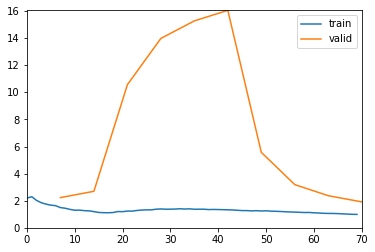

In [13]:
learn_m.fit_one_cycle(10, max_lr=5e-2)

In [14]:
learn_m.unfreeze()

In [82]:
learn_m.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


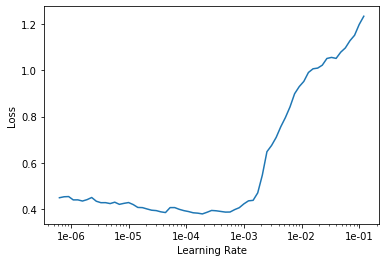

In [83]:
learn_m.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.567858,1.460716,0.791667,00:05
1,0.538360,1.083930,0.708333,00:05
2,0.512300,1.155240,0.666667,00:05
3,0.495313,1.144161,0.750000,00:05
4,0.460223,1.780845,0.750000,00:05
5,0.444281,1.615345,0.791667,00:05
6,0.434200,0.786449,0.791667,00:05
7,0.400256,0.688706,0.791667,00:05
8,0.386756,0.702382,0.791667,00:05
9,0.362494,0.718529,0.791667,00:05


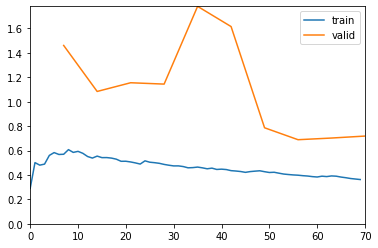

In [15]:
learn_m.fit_one_cycle(10, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.280493,0.722470,0.791667,00:04
1,0.271854,0.728549,0.791667,00:04


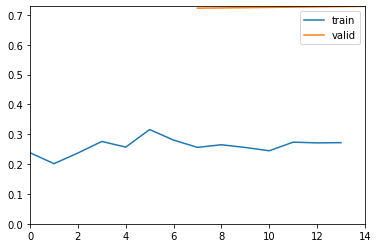

In [16]:
learn_m.fit_one_cycle(2, max_lr=1e-5)

In [17]:
learn_m.save('second')

In [22]:
temp = learn_m.model
temp = temp.to(torch.device('cpu'))
torch.save(temp.state_dict(), '/home/kushaj/Desktop/Github/Final_Techgig/scripts/color_classifier.pth')

In [23]:
import sys
sys.path.insert(0, '../scripts/')

In [24]:
from color_classifier import get_color_model

In [25]:
model = get_color_model(path='../scripts/color_classifier.pth')

In [26]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s